<a href="https://colab.research.google.com/github/Betsy194/Deep-Learning/blob/main/Stochaisc_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
!mkdir Stochaisc_Gradient

In [4]:
from google.colab import files
files.upload()

Saving housing_bangalore.csv to housing_bangalore.csv


{'housing_bangalore.csv': b'area,bedrooms,price\r\n1056,2,39.07\r\n2600,4,120\r\n1440,3,62\r\n1521,3,75\r\n1200,2,51\r\n1170,2,38\r\n2732,4,135\r\n3300,4,155\r\n1310,3,50\r\n3700,5,167\r\n1800,3,82\r\n2785,4,140\r\n1000,2,38\r\n1100,2,40\r\n2250,3,101\r\n1175,2,42\r\n1180,3,48\r\n1540,3,60\r\n2770,3,102\r\n800,1,32\r\n'}

In [5]:
df = pd.read_csv('housing_bangalore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [6]:
X = df.drop('price', axis = 1)
X

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2
5,1170,2
6,2732,4
7,3300,4
8,1310,3
9,3700,5


In [7]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis = 1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [8]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [9]:
np.ones(shape=(2))

array([1., 1.])

In [10]:
a = np.array([1,2,3])
b = np.array([10, 3, 6])

a - b

array([-9, -1, -3])

In [11]:
np.square(a-b)

array([81,  1,  9])

In [12]:
np.sum(np.square(a-b))

91

In [13]:
np.mean(np.square(a-b))

30.333333333333332

In [ ]:
np.dot( w, scaled_X.T)

In [14]:
def batch_gradient(X, y_true, epochs, learning_rate = 0.01):
  no_of_features = X.shape[1]

  w = np.ones(shape = (no_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):

    y_predicted = np.dot( w, scaled_X.T) + b

    w_grad = -(2/total_samples) * (X.T.dot(y_true - y_predicted))
    b_grad = -(2/total_samples) * np.sum(y_true - y_predicted)

    cost = np.mean(np.square(y_true - y_predicted))

    if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = SGD(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd






(array([1., 1.]), 0, 0.2768777174681)

In [15]:
np.dot( w, scaled_X.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

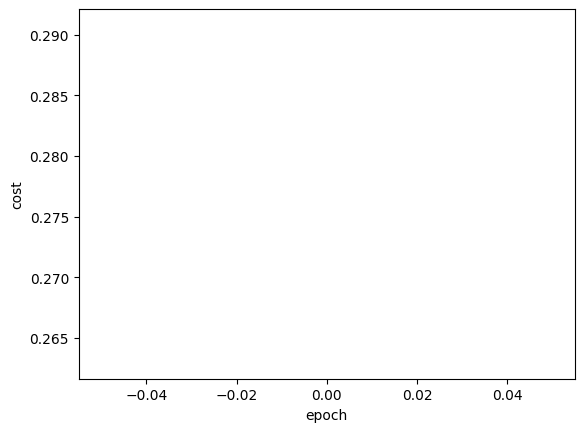

In [16]:
plt.xlabel('epoch')
plt.ylabel('cost')

plt.plot(epoch_list, cost_list)

In [19]:
sy.inverse_transform([[1, 0.5]])

array([[167. ,  99.5]])

In [21]:
def predict(area, bedrooms, w, b):
  scaled_X = sx.transform([[area, bedrooms]])[0]
  scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1]
  return sy.inverse_transform([[scaled_price]])[0][0]
  pass

predict(2600, 4, w, b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


217.04310344827582